**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 8**
Regresión Lineal

---

*   NOMBRE Y MATRÍCULA:
    * A01746998 - Alexys Martin Coate Reyes                            
    * A01796517 - Jonathan Levi Marquez García
    * A01796489 - Anrulfo Alejandro Cavazos Villareal

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
import os
#DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 8/Actividad8_RLineal"
#os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
insurance_df = pd.read_csv('insurance.csv')
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# **Parte 1**. EDA

Efectúa una exploración inicial de los datos a través de:

1a) Estadísticas descriptivas para todas las variables del dataframe.

In [5]:
# Leyendo variables numéricas y obteniendo estadísticas descriptivas
df_num = insurance_df.select_dtypes(include="number")
df_num.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
# Leyendo variables categóricas y obteniendo estadísticas descriptivas
df_obj = insurance_df.select_dtypes(exclude="number")
df_obj.describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


1b) Búsqueda de valores faltantes.

In [7]:
# Comprobando dimensiones del dataframe, así como non-null count para valores faltantes
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


> * * *
> ### **Respuesta**
> Todas las columnas tienen una non-null count de 1338 valores, por lo que ninguna tiene valores faltantes.
> * * *

1c) Histrogramas y boxplots para las variables cuantitativas y diagramas de barras con la frecuencia para las variables categóricas.

### **Grafico para variables cuantitativas**
#### **Histogramas**

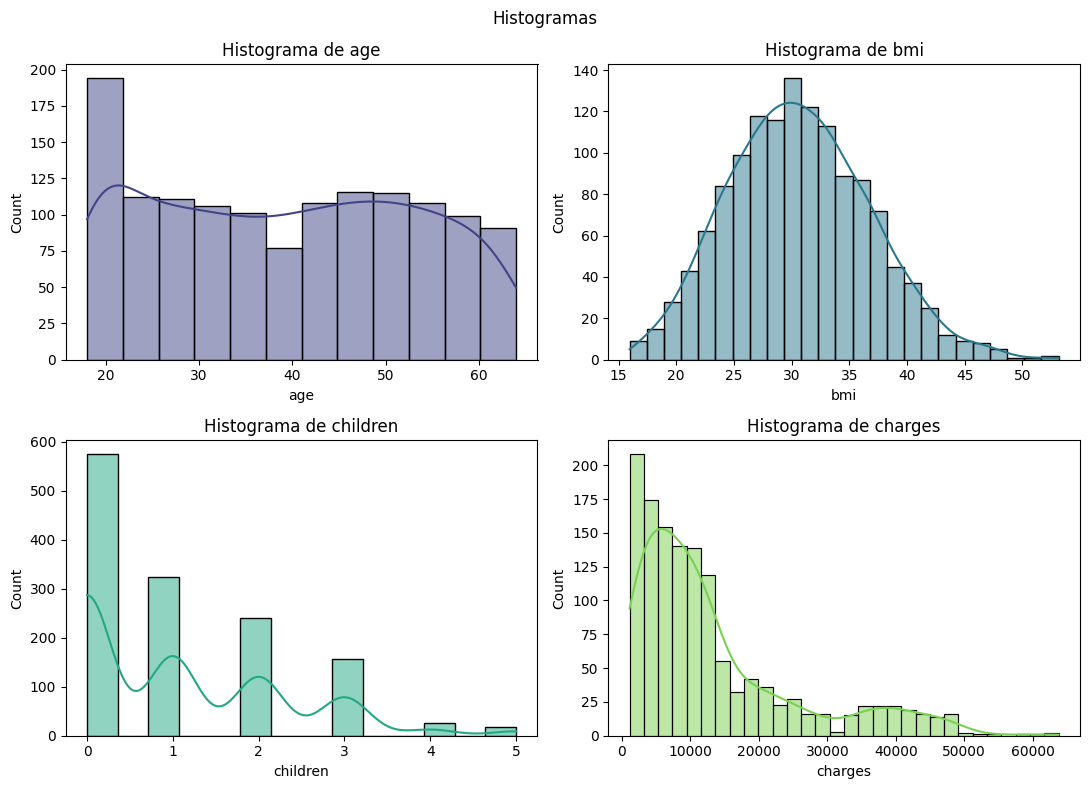

In [8]:
# Graficando Histogramas para variables numéricas

# Seaborn
fig, axes = plt.subplots(2, 2, figsize=(11,8))
axes = axes.ravel()
colores = sns.color_palette("viridis", len(df_num.columns))  # Usa 'viridis' o cualquier otra paleta de colores

for col, ax, color in zip(df_num.columns, axes, colores):
    sns.histplot(data=insurance_df, x=col, ax=ax, color=color, kde=True)
    ax.set_title(f'Histograma de {col}')

fig.suptitle("Histogramas")
fig.tight_layout()  # Ajusta el espaciado entre subplots    

#### **Boxplots**

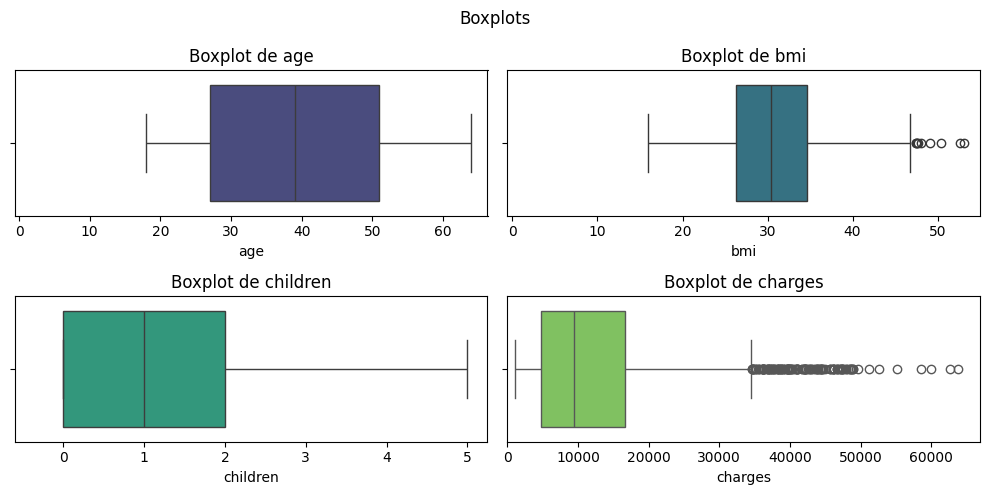

In [9]:
# Graficando Boxplot para variables numéricas

# Seaborn
fig, axes = plt.subplots(2,2, figsize=(10,5))
axes = axes.ravel()
colores = sns.color_palette("viridis", len(df_num.columns))  # Usa 'viridis' o cualquier otra paleta de colores

for col, ax, color in zip(df_num.columns, axes, colores):
    sns.boxplot(data=insurance_df, x=col, ax=ax, color=color)
    ax.set_title(f'Boxplot de {col}')
    ax.set_xlim(-0.6)  # Ajusta el eje y para que empiece en 0

    
fig.suptitle("Boxplots")
fig.tight_layout()  # Ajusta el espaciado entre subplots

### **Grafico para variables categóricas**
#### **Gráficos de barras**

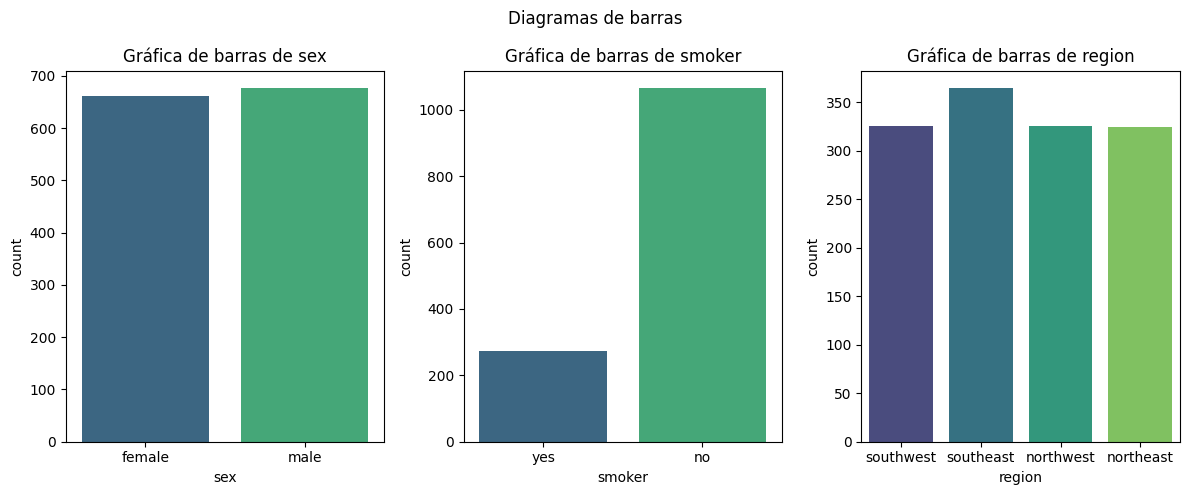

In [10]:
# Graficando diagramas de barras para variables categóricas

# Seaborn
fig, axes = plt.subplots(1,3, figsize=(12,5))
axes = axes.ravel()

for col, ax in zip(df_obj.columns, axes):
    sns.countplot(data=insurance_df, x=col, ax=ax, hue=col, palette="viridis", legend=False)
    ax.set_title(f'Gráfica de barras de {col}')
    
fig.suptitle("Diagramas de barras")
fig.tight_layout()  # Ajusta el espaciado entre subplots

Para responder los siguientes cuestionamientos, genera los gráficos indicados:

2a) ¿Hay diferencias significativas de las primas según el sexo? Compara la distribución de la variable `charges` por medio de un boxplot.

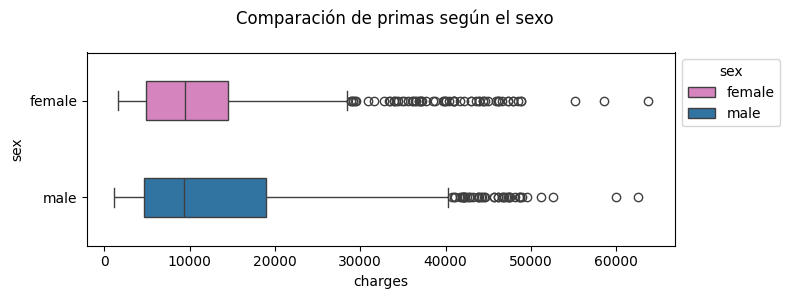

In [11]:
# Graficando la diferencia de charges según el sexo

# Seaborn
fig = plt.figure(figsize=(8,3))
colors = {"Pink": sns.color_palette("tab10")[6], "Blue": sns.color_palette("tab10")[0]}

# Graficando
ax = sns.boxplot(data=insurance_df, x="charges", y="sex", hue="sex", palette=colors.values(), legend=True, width=0.4, dodge=False) 

# Colocando títulos y moviendo leyendas
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
fig.suptitle("Comparación de primas según el sexo")
fig.tight_layout()  # Ajusta el espaciado entre subplots

# Move legend: https://seaborn.pydata.org/generated/seaborn.move_legend.html
# Seaborn color paletts = https://seaborn.pydata.org/tutorial/color_palettes.html

> ### **Respuesta**
> De acuerdo al gráfico tenemos las siguientes observaciones
> * La 'Mediana' de ambos grupos son muy similares
> * Hay una mayor cantidad de hombres que tienen mayores cargos, ya que el 4to cuartil está 10,000 unidades más arriba que el de las mujeres
> * El 3er cuartil de los hombres está alrededor de 5,000 unidades más arriba que el de las mujeres
>
> En resumen, existe una ligera diferencia entre los ambos sexos, siendo los hombre los que tienen primas ligeremante más altas. 
> * * * 

2b) Crea un diagrama de dispersión de `charges` versus el `bmi` que incorpore la distinción por las categorías `smoker` y `children` (tip: utiliza el parámetro `size`) ¿Hay alguna conclusión importante que se derive del gráfico?

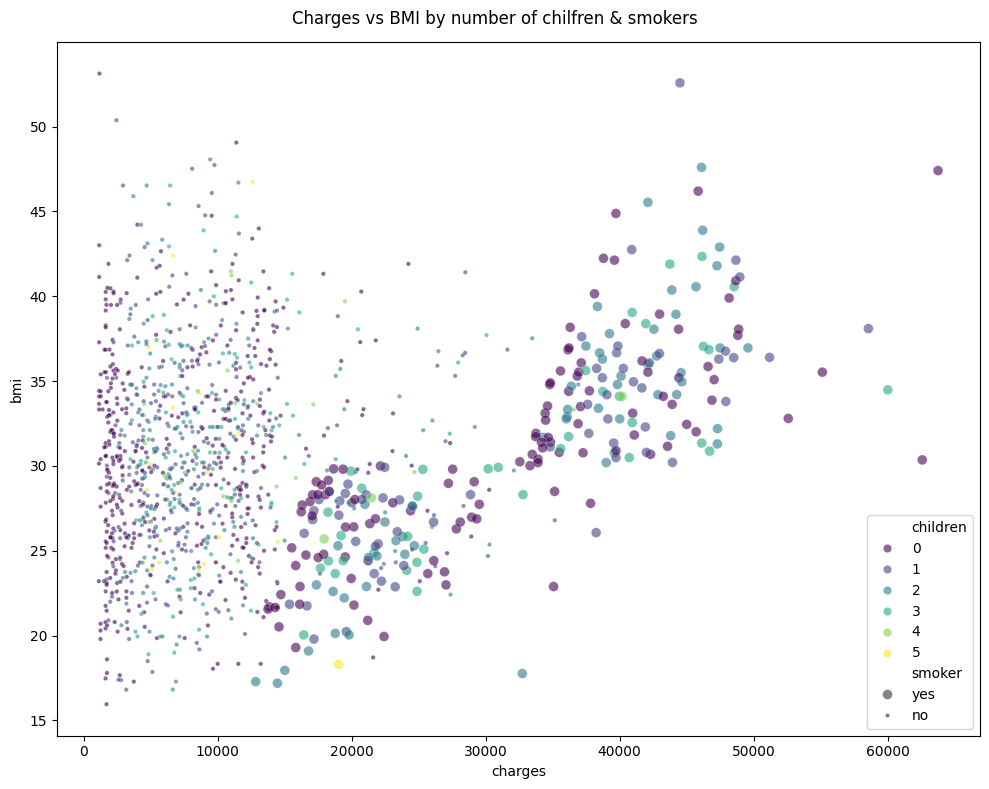

In [12]:
# Seaborn
fig = plt.figure(figsize=(10,8))

# Grafica
ax = sns.scatterplot(data=insurance_df, x="charges", y="bmi", hue="children", size="smoker", sizes=[50,10], palette="viridis", alpha=0.6)

# Títulos
fig.suptitle("Charges vs BMI by number of chilfren & smokers")
fig.tight_layout()  # Ajusta el espaciado entre subplots

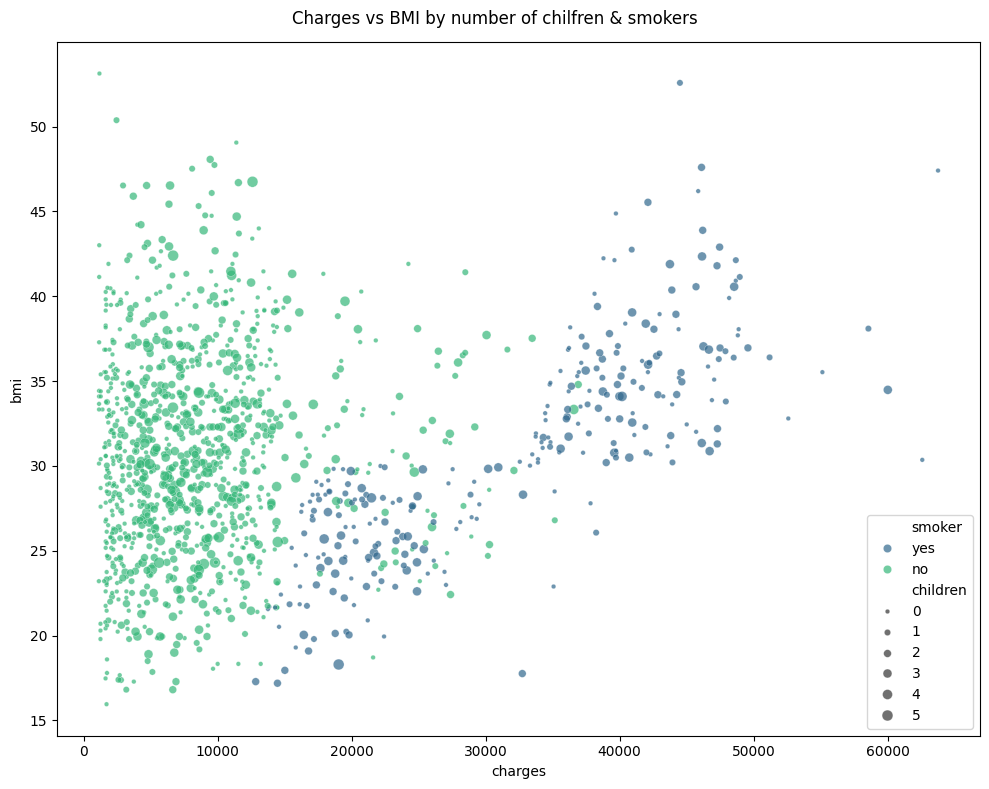

In [13]:
# Seaborn
fig = plt.figure(figsize=(10,8))

# Grafica
ax = sns.scatterplot(data=insurance_df, x="charges", y="bmi", hue="smoker", size="children", sizes=list(range(10 + 1, 10 + 6*10+1,10)), palette="viridis", alpha=0.7)

# Títulos
fig.suptitle("Charges vs BMI by number of chilfren & smokers")
fig.tight_layout()  # Ajusta el espaciado entre subplots

> * * *
> ### **Respuesta**
> De acuerdo al gráfico tenemos las siguientes observaciones
> * Las personas no fumadoras tienen menos cargos que las fumadoras
> * Las personas que no fuman tienden a tener menos cargos altos
> * Las personas fumadoras tienden a tener cargos más altos
> * Las personas con un mayor BMI tienen cargos más altos
>
> #### **Conclusiones**
> - Las personas que no fuman y que tienen un BMI menor tienden a tener menores cargos, mientras que los cargos aumentan si son fumadores y si tienen un mayor BMI, ya que aumenta la probabilidad de que su salud se vea afectada y por ende recurran a su seguro.
> - El ser un fumador y tener un BMI alto provoca un crecimiento lineal en los cargos, mientras que tener el BMI alto y no fumar casi no afecta, manteniendo los cargos constantes en un promedio abajo de los 10,000.
> - El número de niños no tiene mucha relación con el BMI y los cargos. Únicamente las personas que tienen 0 niños tienen una ligera tendencia a tener cargos bajos. 
> * * * 

2c) Elabora un mapa de calor que muestre la correlación de las variables numéricas.

<Axes: >

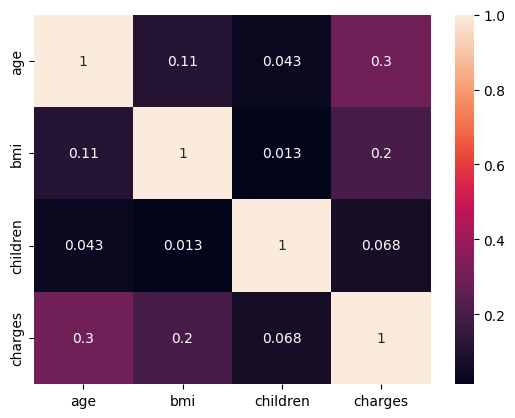

In [14]:
# Graficando mapa de calor
corr_map = round(insurance_df.corr(numeric_only=True), 4)
sns.heatmap(corr_map, annot=True)

Obtén un dataframe con las observaciones que tengan valores atípicos en `charges`.

3a) ¿Cuál es el promedio de `age` y de `bmi` en el dataframe de valores atípicos obtenido?

In [15]:
# Obteniendo un dataframe con los outliers de charges
charges_IQR = insurance_df["charges"].quantile(0.75) - insurance_df["charges"].quantile(0.25)
charges_lower_limit = insurance_df["charges"].quantile(0.25) - (charges_IQR * 1.5)
charges_upper_limit = insurance_df["charges"].quantile(0.75) + (charges_IQR * 1.5)
charges_outliers = insurance_df[(insurance_df["charges"] < charges_lower_limit) | (insurance_df["charges"] > charges_upper_limit)]
charges_outliers

,age,sex,bmi,children,smoker,region,charges
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
29,31,male,36.300,2,yes,southwest,38711.00000
30,22,male,35.600,0,yes,southwest,35585.57600
...,...,...,...,...,...,...,...
1300,45,male,30.360,0,yes,southeast,62592.87309
1301,62,male,30.875,3,yes,northwest,46718.16325
1303,43,male,27.800,0,yes,southwest,37829.72420
1313,19,female,34.700,2,yes,southwest,36397.57600


In [16]:
# Obteniendo el promedio de age y BMI de los outliers de "charges"
charges_outliers[["age","bmi"]].mean().to_frame(name="mean")

,mean
age,41.079137
bmi,35.564604


3b) ¿Qué porcentaje de estas observaciones (en el dataframe de valores atípicos obtenidos) se corresponden a mujeres y a hombres? ¿A fumadores y no fumadores?

In [17]:
# Cálculo de porcentaje de hombres y mujeres de los valores atípicos de la variable charges
gender_percentage = charges_outliers["sex"].value_counts(normalize=True) * 100
gender_percentage = gender_percentage.to_frame(name="Percentage")
display(gender_percentage)

,Percentage
sex,
male,64.028777
female,35.971223


In [18]:
# Cálculo de porcentaje fumadores y no fumadores de los valores atípicos de la variable charges
smoker_percentage = charges_outliers["smoker"].value_counts(normalize=True) * 100
smoker_percentage = smoker_percentage.to_frame("Percentage")
display(smoker_percentage)

,Percentage
smoker,
yes,97.841727
no,2.158273


# **Parte 2**. Preprocesamiento

4. Separa las variables del dataframe: en `X` coloca los predictores y en `y` la variable de respuesta o salida (`charges`).

In [19]:
y = insurance_df["charges"]
X = insurance_df.drop(columns="charges")

5. Divide el conjunto en entrenamiento y prueba (80:20) considerando:


*   El parámetro `random_state` con el valor de 1 para garantizar reproducibilidad.
*   Analiza los diagramas de barras obtenidos en el ejercicio 1c. Con los resultados observados, es conveniente usar la variable `smoker` en la estrategia de estratificación.
*   Como ya tienes separadas en `X` e `y` los predictores y salida, consulta cómo ejecutar la función `train_test_split()` para obtener `Xtrain, Xtest, ytrain, ytest` en una única instrucción.

In [20]:
# Calculando el porcentaje de fumadores y no fumadores
smoker_perc = insurance_df["smoker"].value_counts(normalize=True) * 100
smoker_perc.to_frame(name="Percentage")

,Percentage
smoker,
no,79.521674
yes,20.478326


> * * *
> ### **Respuesta**
> De acuerdo a los diagramas de barras del ejercicio 1c y al cálculo del porcentaje de smokers, se puede observar que hay una gran diferencia entre encuestados, siendo el 20% sumadores y casi el 80% no fumador. Lo que hace "stratify" es mantener la misma proporción de datos de entrenamiento y datos de prubea de acuerdo con la variable indicada, en este caso "smokers". 
> 
> En este caso es conveniente utilizar "stratify" ya que no tenemos una proporción cercana el 50% en cuanto a los datos de fumadores y no fumadores.
> * * * 

In [21]:
from sklearn.model_selection import train_test_split

# Separando datos en conjuntos de entrenamiento y de prueba para las variables de salida y de entrada
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, train_size=0.8, test_size=0.2, random_state=1, stratify=X["smoker"])

display(pd.concat([Xtrain,ytrain], axis=1))     # Mostrar conjunto de entrenamiento
display(pd.concat([Xtest,ytest], axis=1))       # Mostrar conjunto de prueba

,age,sex,bmi,children,smoker,region,charges
42,41,male,21.780,1,no,southeast,6272.47720
847,23,male,50.380,1,no,southeast,2438.05520
625,29,female,26.030,0,no,northwest,3736.46470
394,46,female,32.300,2,no,northeast,9411.00500
621,37,male,34.100,4,yes,southwest,40182.24600
...,...,...,...,...,...,...,...
56,58,female,31.825,2,no,northeast,13607.36875
599,52,female,37.525,2,no,northwest,33471.97189
36,62,female,32.965,3,no,northwest,15612.19335
1179,31,male,29.810,0,yes,southeast,19350.36890


,age,sex,bmi,children,smoker,region,charges
868,61,male,23.655,0,no,northeast,13129.60345
909,32,female,24.600,0,yes,southwest,17496.30600
892,54,male,24.035,0,no,northeast,10422.91665
603,64,female,39.050,3,no,southeast,16085.12750
743,31,female,26.620,0,no,southeast,3757.84480
...,...,...,...,...,...,...,...
785,35,female,27.700,3,no,southwest,6414.17800
360,48,female,32.300,2,no,northeast,10043.24900
508,24,female,25.270,0,no,northeast,3044.21330
1061,57,male,27.940,1,no,southeast,11554.22360


6. Prepara un transformador, denominado `preprocessing`, para aplicar escalamiento *MinMax* a los predictores numéricos y codificación *one-hot* a los categóricas.

### **Escalamiento de las variables numéricas (predictores) - MinMax**

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(Xtest.select_dtypes(include="number"))
X_num_scaled = pd.DataFrame(scaled_data, columns=scaler.get_feature_names_out())
X_num_scaled

,age,bmi,children
0,0.934783,0.239645,0.0
1,0.304348,0.269075,0.0
2,0.782609,0.251479,0.0
3,1.000000,0.719091,0.6
4,0.282609,0.331984,0.0
...,...,...,...
263,0.369565,0.365618,0.6
264,0.652174,0.508876,0.4
265,0.130435,0.289941,0.0
266,0.847826,0.373092,0.2


### **Codificación de variables categóricas (predictores) - OneHot Encoder**

In [23]:
from sklearn.preprocessing import OneHotEncoder

#encoder = OneHotEncoder(sparse_output=False)
encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_data = encoder.fit_transform(Xtest.select_dtypes(exclude="number"))
X_cat_encoded = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
X_cat_encoded

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
263,0.0,0.0,0.0,0.0,1.0
264,0.0,0.0,0.0,0.0,0.0
265,0.0,0.0,0.0,0.0,0.0
266,1.0,0.0,0.0,1.0,0.0


### **Utilizando Transformadores**

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score


# Identificando columnas numéricas
num_attribs = Xtrain.select_dtypes(include="number").columns.to_list()
cat_attirbs = Xtrain.select_dtypes(exclude="number").columns.to_list()
print("Numerical Attributes: ", num_attribs)
print("Categorical Attributes: ", cat_attirbs)

# Creando pipeline para variables numéricas, aplicando MinMax
num_pipeline = Pipeline([
    ('scaler', MinMaxScaler())
])

# Creando pipeline para variables categóricas, aplicando OneHot
cat_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False)) 
])

# Crear el ColumnTransformer que aplica los transformadores a las columnas correspondientes
preprocessing = ColumnTransformer(
    transformers=[
        ('num', num_pipeline, num_attribs),
        ('cat', cat_pipeline, cat_attirbs)
    ]
)

# Procesando información Xtest (Obtenemos lo mismo que con los métodos de arriba)
X_preprocessed =  preprocessing.fit_transform(Xtest)
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=preprocessing.get_feature_names_out())
X_preprocessed_df

Numerical Attributes:  ['age', 'bmi', 'children']
Categorical Attributes:  ['sex', 'smoker', 'region']


,num__age,num__bmi,num__children,cat__sex_male,cat__smoker_yes,cat__region_northwest,cat__region_southeast,cat__region_southwest
0,0.934783,0.239645,0.0,1.0,0.0,0.0,0.0,0.0
1,0.304348,0.269075,0.0,0.0,1.0,0.0,0.0,1.0
2,0.782609,0.251479,0.0,1.0,0.0,0.0,0.0,0.0
3,1.000000,0.719091,0.6,0.0,0.0,0.0,1.0,0.0
4,0.282609,0.331984,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...
263,0.369565,0.365618,0.6,0.0,0.0,0.0,0.0,1.0
264,0.652174,0.508876,0.4,0.0,0.0,0.0,0.0,0.0
265,0.130435,0.289941,0.0,0.0,0.0,0.0,0.0,0.0
266,0.847826,0.373092,0.2,1.0,0.0,0.0,1.0,0.0


# **Parte 3**. Entrenando y evaluando el modelo de RL

7. Ejecuta un pipeline con el transformador creado y el algoritmo de regresión lineal para entrenar un modelo denominado `lr_model`.

Evalúa el modelo en el conjunto de prueba y obtén la raíz del error cuadrático medio (`RMSE`) y la métrica `R` cuadrado ($R^2$). Aunque ésta última la estudiarás a detalle la próxima semana, ahora sólo debes saber que toma valores entre 0 y 1, donde 1 indica un ajuste perfecto y, por tanto, un modelo muy fiable para las previsiones futuras. La función de scikit-learn que determina esta métrica es: [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

### **Creando Pipeline con regresión lineal y evaluando**

In [25]:
# Creación de un pipeline que contenga el transformador "preprocessing" y un modelo de regresión lineal
lr_model = Pipeline([
    ("preposcessing", preprocessing),
    ("model", LinearRegression())
])

# Entrenando el modelo
lr_model.fit(Xtrain, ytrain)

# Realizando predicciones y evaluando el modelo
ypred = lr_model.predict(Xtest)
ypred_df = pd.DataFrame(ypred, columns=["predicted charges"])

# Generando df de comparación predicciones vs ytest
pd.concat([ypred_df, ytest.reset_index(drop=True)], axis=1)

# https://learning.oreilly.com/library/view/hands-on-machine-learning/9781098125967/ch02.html#idm45720240179728

,predicted charges,charges
0,11372.808138,13129.60345
1,27856.471433,17496.30600
2,9733.365896,10422.91665
3,18149.775735,16085.12750
4,4115.250761,3757.84480
...,...,...
263,6810.613666,6414.17800
264,12101.708557,10043.24900
265,2684.038240,3044.21330
266,11477.741965,11554.22360


### **Evaluando conjunto de prueba con RMSE y R2**

In [ ]:
# Calcular RMSE y R2
rmse = root_mean_squared_error(ytest, ypred)
r2 = r2_score(ytest, ypred)

# Imprimiendo error
print(f"Root Medium Squared Error (RMSE): {rmse}")
print(f"R Squared (R2): {r2}")

Root Medium Squared Error (RMSE): 5698.759784532358
R Squared (R2): 0.7538547215244323


**Valora el rendimiento del modelo con los siguientes cambios:**


8. Reemplaza los outliers de `charges` con el límite superior (`Q3 + 1.5 * IQR`). Haz el cambio en ambos conjuntos: `ytrain` y `ytest`, previo a la aplicación del mismo pipeline. Guarda el modelo como `lr_model2`.


### **Reemplazando Outliers con límite superior en "ytest" y "ytrain"**

In [34]:
# Reemplazando los outliers con el límite superior
ytrain_no_out = ytrain.apply(lambda x: min(x, charges_upper_limit))
ytest_no_out = ytest.apply(lambda x: min(x, charges_upper_limit))

print(charges_lower_limit)
print(charges_upper_limit)

-13109.1508975
34489.350562499996


### **Creando Pipeline con regresión lineal y evaluando**

In [28]:
from sklearn.pipeline import make_pipeline

# Copia del pipeline anterior pero guarda un modelo sin los outliers de charges
lr_model2 = make_pipeline(
    preprocessing,
    LinearRegression()
)

# Entrenando el modelo
lr_model2.fit(Xtrain, ytrain_no_out)

# Realizando predicción
ypred2 = lr_model2.predict(Xtest)
ypred2_df = pd.DataFrame(ypred2, columns=["predicted charges"])

# Generando df de comparación predicciones vs ytest
pd.concat([ypred2_df, ytest_no_out.reset_index(drop=True)], axis=1)

,predicted charges,charges
0,11675.380212,13129.60345
1,24815.343956,17496.30600
2,10196.808080,10422.91665
3,16422.509573,16085.12750
4,5053.327985,3757.84480
...,...,...
263,7307.068285,6414.17800
264,11652.513710,10043.24900
265,3905.077747,3044.21330
266,11433.892264,11554.22360


### **Evaluando conjunto de prueba con RMSE y R2**

In [29]:
# Calcular RMSE y R2
rmse_2 = root_mean_squared_error(ytest_no_out, ypred2) 
r2_2 = r2_score(ytest_no_out, ypred2)

# Imprimiendo error
print(f"Root Medium Squared Error (RMSE): {rmse_2}")
print(f"R Squared (R2): {r2_2}")

Root Medium Squared Error (RMSE): 4812.061728319821
R Squared (R2): 0.7637776364359081


9. Prepara otro transformador, denominado `preprocessing2`, para aplicar escalamiento estándar a los predictores numéricos y codificación ordinal a los categóricas. Aplícalo en un nuevo pipeline utilizando nuevamente regresión lineal. Guarda el modelo como `lr_model3`.

**Nota.** Los cambios se ejecutan de manera consecutiva, por ejemplo: el reemplazo de los outliers también se ejecuta previo al transformador `preprocessing2` y así sucesivamente.

### **Creando transformador de preprocesamiento**

In [30]:
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Generando transformador de preprocesamiento 2
preprocessing2 = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include=np.number)),
    (OrdinalEncoder(), make_column_selector(dtype_include=object))    
)

### **Evaluando conjunto de prueba con RMSE y R2**

In [31]:
# Generando nuevo modelo de pipeline con nuevo preprocessing
lr_model3 = make_pipeline(
    preprocessing2,
    LinearRegression()
)

# Entrenando el modelo
lr_model3.fit(Xtrain, ytrain_no_out)

# Realizando predicción
ypred3 = lr_model3.predict(Xtest)
ypred3_df = pd.DataFrame(ypred3, columns=["predicted charges"])

# Generando df de comparación predicciones vs ytest
pd.concat([ypred3_df, ytest_no_out.reset_index(drop=True)], axis=1)

,predicted charges,charges
0,11756.141637,13129.60345
1,24766.746229,17496.30600
2,10275.003284,10422.91665
3,16545.098868,16085.12750
4,5209.063443,3757.84480
...,...,...
263,7286.468117,6414.17800
264,11702.564910,10043.24900
265,3971.849065,3044.21330
266,11594.222587,11554.22360


### **Evaluando conjunto de prueba con RMSE y R2**

In [32]:
# Calcular RMSE y R2
rmse_3 = root_mean_squared_error(ytest_no_out, ypred3) 
r2_3 = r2_score(ytest_no_out, ypred3)

# Imprimiendo error
print(f"Root Medium Squared Error (RMSE): {rmse_3}")
print(f"R Squared (R2): {r2_3}")

Root Medium Squared Error (RMSE): 4811.600670456455
R Squared (R2): 0.7638229005936741


10. Utiliza regresión polinomial para verificar si se produce un mejor ajuste. Intenta con varios grados, aunque debes dejar en el código sólo el de mejor rendimiento. Guarda el modelo como `lr_model4`.

### **Creando Modelo con regresión polinomial**

In [33]:
from sklearn.preprocessing import PolynomialFeatures


# Generando pipeline 4 con modelo polinomial
lr_model4 = Pipeline([
    ("preprocessing", preprocessing2),
    ("polinomio", PolynomialFeatures(degree=2)),
    ("model", LinearRegression())
])

# Entrando datos y prediciendo valores de datos de prubea
lr_model4.fit(Xtrain, ytrain_no_out)
ypred4 = lr_model4.predict(Xtest)

# Generando df de comparación predicciones vs ytest
ypred_df = pd.DataFrame(ypred, columns=["predicted charges"])
pd.concat([ypred_df, ytest.reset_index(drop=True)], axis=1)

# Calcular RMSE y R2
rmse_4 = root_mean_squared_error(ytest_no_out, ypred4) 
r2_4 = r2_score(ytest_no_out, ypred4)

# Imprimiendo error
print(f"Root Medium Squared Error (RMSE): {rmse_4}")
print(f"R Squared (R2): {r2_4}")

Root Medium Squared Error (RMSE): 4285.570310965558
R Squared (R2): 0.8126404302016095


> * * *
> ### **Respuesta**
> El mejor grado de polinomio fue el de grado 2 según las diversas pruebas. Ofreció el R2 más cercano a 1 y el "RMSE" más bajo. 
> * * * 